Neste breve notebook, fazemos uma simples análise dos dados coletados através da aplicação de um questionário em escala Likert aplicado por Google Forms a ex-participantes do Newston. Enfatizamos que, para proteger a privacidade dos envolvidos, não citamos nomes nem identificamos o ex-participantes. Dessa forma, os resultados do Google-Forms foram pré-processados de forma a remover as informações pessoais dos envolvidos e deixar os dados prontos para análise.

# 0. Células Chave

In [54]:
# Importando as bibliotecas
import pandas as pd                                # importa a biblioteca Pandas para análises de dados
import matplotlib.pyplot as plt                    # importa o módulo Pyplot da biblioteca Matplotlib para confecção de gráficos

In [55]:
# Ajusta o tamanho da fonte para padrões de artigo
plt.rcParams.update({
        'font.size': 10,              # Tamanho da fonte
        'axes.titlesize': 10,         # Tamanho da fonte do título
        'axes.labelsize': 9,          # Tamanho da fonte dos rótulos
        'xtick.labelsize': 8,         # Tamanho da fonte dos ticks x
        'ytick.labelsize': 8,         # Tamanho da fonte dos ticks y
        'legend.fontsize': 8,         # Tamanho da fonte da legenda
        'figure.figsize': (3.5, 2.5)  # Tamanho da figura
    })

# 1. Visualização dos Dados

Nesta seção, visualizamos as respostas dos participantes. Nosso primeiro passo é importar o arquivo "respostas.csv" que contém nossos dados, já pré-processados. Isso é implementado na célula abaixo.

In [56]:
# lê o arquivo .csv
df_quest = pd.read_csv('respostas.csv')

# Renomear os labels (índices) para "Participante 1, Participante 2, etc."
df_quest.index = [f"Participante {i+1}" for i in range(len(df_quest))]

# exibição do DataFrame
df_quest

,Área,Questão 1,Questão 2,Questão 3,Questão 4,Questão 5,Questão 6,Questão 7,Questão 8,Questão 9,Questão 10,Questão 11
Participante 1,Física,Muito Boa,Muito Boa,Muito Boa,Muito Bom,Muito,Muito,Extremamente,Extremamente,Participar do jornal trouxe muitos benefícios ...,Encontrar um equilíbrio entre o que a equipe p...,Penso que quanto mais pessoas estiverem dispos...
Participante 2,Física,Muito Boa,Muito Boa,Muito Boa,Muito Bom,Extremamente,Extremamente,Extremamente,Muito,Colaborou em muito para melhora de minha escri...,"No momento, não sei.","Talvez expandir o escopo do projeto, no sentid..."
Participante 3,Outro,Boa,Boa,Moderada,Bom,Muito,Pouco,Muito,Extremamente,Ingressei no Newston logo no início: estive pr...,Acredito que falhamos na captação de novos int...,"Como pontuei no tópico anterior, acredito que ..."
Participante 4,Física,Muito Boa,Muito Boa,Muito Boa,Muito Bom,Extremamente,Extremamente,Extremamente,Extremamente,Participei da criação do Newston e da elaboraç...,O projeto precisa de uma divulgação mais ampla...,"Idealmente, seria necessário criar cargos espe..."
Participante 5,Outro,Boa,Boa,Boa,Muito Bom,Muito,Moderadamente,Moderadamente,Muito,Participar do Newsron Jornal como revisora fo...,Acredito que o projeto poderia oferecer bolsas...,"Para tornar os projetos ainda mais relevantes,..."


Em que os enunciados das questões se encontram descritos a seguir.

In [57]:
questions = pd.Index([
    'No que diz respeito a seu desenvolvimento pessoal, a contribuição do Newston foi:',                              # Questão 1
    'Avalie a contribuição do projeto para o seu senso de responsabilidade e organização: ',                          # Questão 2
    'Como você avalia a qualidade dos temas abordados no projeto? ',                                                  # Questão 3
    'Como você avaliaria o quesito trabalho de equipe durante o período de sua participação no Newston?',             # Questão 4
    'O quanto o Newston lhe ajudou a desenvolver suas habilidades de escrita?',                                       # Questão 5
    'O quanto o Newston lhe ajudou a desenvolver suas habilidades de didática?',                                      # Questão 6
    'O quanto o Newston lhe ajudou a desenvolver suas habilidades de divulgação científica?',                         # Questão 7
    'Quanto o projeto lhe ajudou no desenvolvimento de novas habilidades, além das treinadas durante a graduação?',   # Questão 8
    'Faça um simples relato de sua participação no Newston e como ela colaborou para sua trajetória. ',               # Questão 9
    'Quais aspectos do projeto você acha que poderiam ser melhorados? ',                                              # Questão 10
    'O que você sugeriria para tornar o projeto mais eficaz no futuro? '                                              # Questão 11
])

# laço for para printar os enunciados das questões
for j in range(len(questions)):
  if j == 0:
    print(f'Questão {0}: Área')
  else:
    print(f'Questão {j}: ' + str( questions[j] ) ) # printa o enunciado de cada questão

Questão 0: Área
Questão 1: Avalie a contribuição do projeto para o seu senso de responsabilidade e organização: 
Questão 2: Como você avalia a qualidade dos temas abordados no projeto? 
Questão 3: Como você avaliaria o quesito trabalho de equipe durante o período de sua participação no Newston?
Questão 4: O quanto o Newston lhe ajudou a desenvolver suas habilidades de escrita?
Questão 5: O quanto o Newston lhe ajudou a desenvolver suas habilidades de didática?
Questão 6: O quanto o Newston lhe ajudou a desenvolver suas habilidades de divulgação científica?
Questão 7: Quanto o projeto lhe ajudou no desenvolvimento de novas habilidades, além das treinadas durante a graduação?
Questão 8: Faça um simples relato de sua participação no Newston e como ela colaborou para sua trajetória. 
Questão 9: Quais aspectos do projeto você acha que poderiam ser melhorados? 
Questão 10: O que você sugeriria para tornar o projeto mais eficaz no futuro? 


Aqui, é conveniente de uma forma mais visualmente agrádavel para analisar as respostas. Por esse motivo, abaixo fazemos um conjunto de gráficos de pizza para as respostas das perguntas de alternativa.

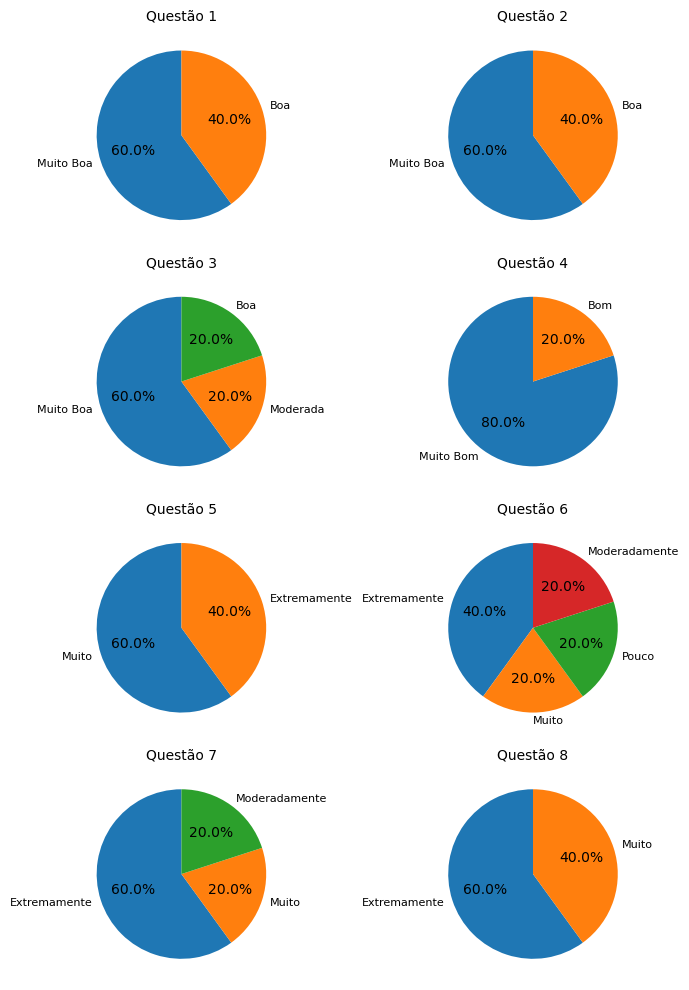

In [58]:
# seleciona apenas as respostas das perguntas de alternativa
colunas = df_quest.columns          # variável das colunas
num_perguntas = len(colunas) - 3    # perguntas de alternativas (1 até 8)

# Definir layout da grade
cols = 2                                                  # Número de colunas
rows = (num_perguntas) // cols                            # Número de linhas
figsize = (cols * 3.5, rows * 2.5)                        # tamanho da figura
fig, axes = plt.subplots(rows, cols, figsize=figsize)     # gera os subplots com a grade
axes = axes.flatten()                                     # permite identificar o contador ax[j] como uma lista, e não uma matrix ax[i][j]

# Loop para gerar os gráficos
for j in range(1,num_perguntas):
    ax = axes[j - 1]  # seleciona o gráfico  ser plotado

    df_quest[colunas[j]].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax) # plota o gráfico de pizza
    ax.set_title('Questão ' + f'{j}')                                                     # define o título "Questão j"
    ax.set_ylabel('')                                                                     # Esconde o eixo y

# Ajustes finais
plt.tight_layout()                                                                        # layout compacto
plt.savefig('figuras/todas_perguntas_pizza.png', bbox_inches='tight', dpi=300)            # salva a figura
plt.show()                                                                                # exibe a figura

# 2. Códigos em $\LaTeX$

Para fins do artigo, a seguir usamos nosso DataFrame para gerar códigos em $\LaTeX$. Começamos pelas questões de alternativa e finalizamos com os relatos.

## a) Questões de Alternativa

Nosso primeiro passo é gerar uma tabela com os enunciados das perguntas, feito a seguir.

In [59]:
# lista com as alternativas de cada pergunta
options = [
    ["Muito Baixa", "Baixa", "Razoável", "Boa", "Muito Boa"],                                 # Questão 1
    ["Muito Baixa", "Baixa", "Moderadamente", "Boa", "Muito Boa"],                            # Questão 2
    ["Muito Fraca", "Fraca", "Moderada", "Boa", "Muito Boa"],                                 # Questão 3
    ["Muito Ruim", "Ruim", "Razoável", "Bom", "Muito Bom"],                                   # Questão 4
    ["Muito Pouco", "Pouco", "Moderadamente", "Muito", "Extremamente"],                       # Questão 5
    ["Muito Pouco", "Pouco", "Moderadamente", "Muito", "Extremamente"],                       # Questão 6
    ["Muito Pouco", "Pouco", "Moderadamente", "Muito", "Extremamente"],                       # Questão 7
    ["Muito Pouco", "Pouco", "Moderadamente", "Muito", "Extremamente", "Boa", "Muito Boa"]    # Questão 8
]

# código LaTeX
latex_codeP = "\\begin{enumerate}\n"                                                     # inicia a lista numerada
for i, enunciado in enumerate(questions[:8], start=1):                                   # usa os primeiros 8 enunciados
    latex_codeP += f"    \\item {enunciado}\n"                                           # adiciona o enunciado à lista
    if i <= len(options):                                                                # considera apenas as questões de alternativa
        latex_codeP += "    \\\\ \\noindent "                                            # quebra de linha e alinha à esquerda
        latex_codeP += " \\quad ".join([f"$\\bigcirc$ {opt}" for opt in options[i-1]])   # adiciona " ◯ " para cada alternativa
    latex_codeP += "\n\n"                                                                # quebra de linha
latex_codeP += "\\end{enumerate}"                                                        # finaliza a lista numerada

# mostra o código
print(latex_codeP)

\begin{enumerate}
    \item No que diz respeito a seu desenvolvimento pessoal, a contribuição do Newston foi:
    \\ \noindent $\bigcirc$ Muito Baixa \quad $\bigcirc$ Baixa \quad $\bigcirc$ Razoável \quad $\bigcirc$ Boa \quad $\bigcirc$ Muito Boa

    \item Avalie a contribuição do projeto para o seu senso de responsabilidade e organização: 
    \\ \noindent $\bigcirc$ Muito Baixa \quad $\bigcirc$ Baixa \quad $\bigcirc$ Moderadamente \quad $\bigcirc$ Boa \quad $\bigcirc$ Muito Boa

    \item Como você avalia a qualidade dos temas abordados no projeto? 
    \\ \noindent $\bigcirc$ Muito Fraca \quad $\bigcirc$ Fraca \quad $\bigcirc$ Moderada \quad $\bigcirc$ Boa \quad $\bigcirc$ Muito Boa

    \item Como você avaliaria o quesito trabalho de equipe durante o período de sua participação no Newston?
    \\ \noindent $\bigcirc$ Muito Ruim \quad $\bigcirc$ Ruim \quad $\bigcirc$ Razoável \quad $\bigcirc$ Bom \quad $\bigcirc$ Muito Bom

    \item O quanto o Newston lhe ajudou a desenvolver suas

Agora, basta gerar o código com as respostas.

In [60]:
# gera uma tabela em LaTeX com o DataFrame
latex_codeR = df_quest.iloc[:, :9].transpose().to_latex(index=True, caption="Respostas das questões", label="tab:primeiras_8_colunas")

# Salvando o código LaTeX em um arquivo
with open("dataframe_quest.tex", "w") as f:
    f.write(latex_codeR)

# Exibe o LaTeX gerado
print(latex_codeR)

\begin{table}
\caption{Respostas das questões}
\label{tab:primeiras_8_colunas}
\begin{tabular}{llllll}
\toprule
 & Participante 1 & Participante 2 & Participante 3 & Participante 4 & Participante 5 \\
\midrule
Área & Física & Física & Outro & Física & Outro \\
Questão 1 & Muito Boa & Muito Boa & Boa & Muito Boa & Boa \\
Questão 2 & Muito Boa & Muito Boa & Boa & Muito Boa & Boa \\
Questão 3 & Muito Boa & Muito Boa & Moderada & Muito Boa & Boa \\
Questão 4 & Muito Bom & Muito Bom & Bom & Muito Bom & Muito Bom \\
Questão 5 & Muito & Extremamente & Muito & Extremamente & Muito \\
Questão 6 & Muito & Extremamente & Pouco & Extremamente & Moderadamente \\
Questão 7 & Extremamente & Extremamente & Muito & Extremamente & Moderadamente \\
Questão 8 & Extremamente & Muito & Extremamente & Extremamente & Muito \\
\bottomrule
\end{tabular}
\end{table}



## b) Relatos

Para os relatos, de forma a tornar a visualização agradável, fazemos apenas um código LaTeX, unificando enunciado e respostas.

In [61]:
# Função para gerar listas LaTeX
def generate_latex_list(df):  # Define uma função chamada 'generate_latex_list' que recebe um DataFrame como entrada
  latex_code = ""             # Inicializa uma string vazia chamada 'latex_code' para armazenar o código LaTeX gerado

  j = 7                                            # Inicializa um contador 'j' com o valor 7. Isso se refere à primeira questão de relato
  for col_idx, col_name in enumerate(df.columns):  # Itera sobre as colunas do DataFrame, com 'col_idx' como índice e 'col_name' como nome da coluna
    j = j + 1                                      # Incrementa o contador 'j' em 1 a cada iteração, para acompanhar o índice da pergunta no array 'questions'

    # A linha abaixo diciona o título da questão (col_name) em negrito e o enunciado da questão (questions[j]) ao código LaTeX. O tamanho é definido para 'small' e inicia um ambiente 'description' para listar as respostas. É selecionado um espaçamento de 10pt
    latex_code += "{\\small"+f"\\textbf{{{col_name}}}"+":"+questions[j]+"\n"+"\\begin{description}\n\setlength{\itemsep}{10pt}\n"


    for i, text in enumerate(df[col_name], start=1):                                # Itera sobre as respostas da questão atual, com 'i' como índice e 'text' como texto da resposta
      formatted_text = text.replace("\n", " ")                                      # Substitui quebras de linha por espaços em branco no texto da resposta
      latex_code += f"    \\item \\textbf{{Participante {i}:}} {formatted_text}\n"  # Adiciona a resposta ao código LaTeX, formatando o texto com o número do participante em negrito
    latex_code += "\\end{description}}\n\n\hline\\vspace{0.5cm}\n\n"                # Finaliza o ambiente 'description', adiciona uma linha horizontal e um espaço vertical

  return latex_code  # Retorna o código LaTeX gerado

# Gerar código LaTeX
latex_output = generate_latex_list(df_quest.iloc[:, 9:])  # Chama a função 'generate_latex_list' com as colunas de relatos do DataFrame
print(latex_output)                                       # Imprime o código LaTeX gerado

{\small\textbf{Questão 9}:Faça um simples relato de sua participação no Newston e como ela colaborou para sua trajetória. 
\begin{description}
\setlength{\itemsep}{10pt}
    \item \textbf{Participante 1:} Participar do jornal trouxe muitos benefícios para a minha vida. Ao me envolver em diversas etapas ao longo da minha trajetória, percebi que minha formação acadêmica também foi enriquecida. Tive a oportunidade de atuar na parte organizacional, escrever artigos, divulgar conteúdo nas redes sociais e interagir com pessoas de várias instituições, além de estudantes e professores da minha própria instituição. Essa experiência gerou um aprendizado valioso que levarei para toda a vida.
    \item \textbf{Participante 2:} Colaborou em muito para melhora de minha escrita. Assim como, para o desenvolvimento de minha didática, pois, por muitas vezes tinhamos que abordar tema complexos de forma a deixar sucinto para o público.
    \item \textbf{Participante 3:} Ingressei no Newston logo no início

# Análise dos Dados

Com a aplicação de um questionário foi possível realizar um processo de inferência estatística ao analisar as respostas de uma amostra de ex-participantes do projeto. A análise dos gráficos de pizza referente às respostas das questões em escala Likert nos revela uma percepção amplamente positiva no que diz respeito ao Newston Jornal. 

Podemos destacar algumas observações-chave como o desenvolvimento pessoal e organização (Questões 1 e 2), onde 100\% dos participantes avaliaram a contribuição do projeto para o desenvolvimento pessoal como "Boa" ou "Muito Boa", dos quais 66,7\% consideraram que o projeto teve uma contribuição "Muito Boa" para sua responsabilidade e organização. Quanto à qualidade de temas do projeto (Questão 3) A maioria dos respondentes (50\%) classificou os temas como "Muito Boa", e apenas 16,7\% indicaram "Moderada", mostrando uma boa aceitação da temática abordada. A maioria (83,3\%) avaliou a experiência de trabalho em equipe como ``Muito Boa'' (Questão 4), indicando que o projeto promoveu uma colaboração eficiente. 

O desenvolvimento de habilidades específicas variou entre os aspectos avaliados. A escrita (Questão 5) teve impacto positivo, com 66,7\% avaliando como `"Muito" e 33,3\% como "Extremamente". Na didática (Questão 6), houve maior dispersão, indicando menor ênfase no projeto. Já a divulgação científica (Questão 7) foi altamente beneficiada, com 50\% classificando como "Extremamente" e 33,3\% como "Muito". Por fim, o impacto no aprendizado de novas habilidades (Questão 8) foi significativo, com 50\% avaliando como ``Extremamente'' e 50\% como "Muito".

Visto que, em sua totalidade, todas as respostas expressaram termos positivos em relação as perguntas realizadas, fica evidente que o projeto Newston impactou positivamente todos os seus participantes, especialmente no desenvolvimento de habilidades de escrita, trabalho de equipe e divulgação científica. A única categoria com respostas mais distribuídas foi a do desenvolvimento de habilidades didáticas, o que pode indicar um ponto de melhoria para futuras edições, caso o projeto retorne com suas atividades.

As três últimas perguntas do questionário foram de respostas abertas. A Questão 9 pediu um simples relato de como foi a participação do membro no projeto, e como essa participação colaborou para a trajetória do participante. Os relatos indicam que a participação no Newston proporcionou aos participantes uma série de benefícios, incluindo o desenvolvimento de habilidades práticas, aprimoramento da escrita e comunicação, experiências de trabalho em equipe e interdisciplinaridade, além de contribuir significativamente para suas trajetórias acadêmicas e pessoais.

Sobre a Questão 10, ao serem questionados sobre os aspectos do projeto que poderiam ser melhorados, em geral, as respostas indicaram que há uma série de áreas onde o projeto Newston Jornal pode ser aprimorado. Os principais pontos incluem um equilíbrio entre a capacidade da equipe e a quantidade de produção, divulgação do projeto e incentivos financeiros e/ou curriculares, promover um ambiente de colaboração saudável e sustentável. Sugestões que refletem a busca por um projeto mais robusto, envolvente e de alta qualidade, capaz de se manter relevante e atraente para seus participantes e leitores.

A Questão 11, última do questionário aplicado, solicitava sugestões dos participantes para tornar o projeto mais eficaz. Nesse sentido, as respostas indicam várias maneiras de tornar o projeto Newston Jornal mais eficaz no futuro. Como por exemplo, uma maior colaboração e organização, uma expansão do escopo do projeto para incluir outras mídias (*podcasts* e vídeos). Também houve sugestões no que diz respeito a estruturação melhor no Departamento para valorizar a experiência dos alunos e fortalecer o reconhecimento do projeto, e a criação de cargos mais específicos. Além disso, foi sugerido que abordar temas de maneira mais prática e aplicável, aproximando as questões cotidianas das pessoas, pode tornar o conteúdo mais palpável e relevante para o público. Essas sugestões refletem a busca por um projeto mais colaborativo, diversificado, estruturado, qualificado e relevante, capaz de se adaptar às necessidades e interesses do público-alvo.

Com base nos resultados analisados, é possível concluir que o Newston Jornal tem sido uma experiência enriquecedora para seus integrantes, proporcionando desenvolvimento de habilidades práticas (como escrita, revisão, *design* e organização), além de promover interação entre diferentes áreas do conhecimento. Entretanto, sua sustentabilidade e relevância futura dependem de ajustes organizacionais, maior divulgação e adaptação às novas demandas de conteúdo e formatos. Essas melhorias podem transformar o projeto em uma iniciativa ainda mais sólida, envolvente e reconhecida dentro e fora da universidade.